# Importing required libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2 as cv
import numpy as np
import os

# Reading data from files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Dataset/train/"
files = os.listdir(path)

In [ ]:
X = []
Y = []

for img_fold in files:
    img_path = path+str(img_fold)
    for img_name in os.listdir(img_path):
        #print(f"reading class :: {img_fold}")
        img = cv.imread(img_path+"/"+img_name,0) # here 2nd argument '0' converts 3D array to 2D array
        if img is not None: # Check if the image is None or empty
            # we have to resize the image because it is very large
            img = cv.resize(img,(96,96))
            X.append(img)
            Y.append(img_fold)
        else:
            print(f"Error reading image file {img_name}")
#     print("***********next**********")

print("Dataset Created Successfully")

Error reading image file 61
Error reading image file 52
Error reading image file 53
Error reading image file 55
Error reading image file 54
Error reading image file 56
Error reading image file 57
Error reading image file 59
Error reading image file 58
Error reading image file 60
Dataset Created Successfully


In [ ]:
print(set(Y))

{'6', '7', '42', '22', '50', '3', '57', '56', '53', '55', '35', '12', '30', '31', '24', '46', '33', '4', '36', '58', '34', '14', '25', '45', '54', '16', '5', '27', '26', '1', '41', '19', '48', '60', '32', '29', '2', '18', '37', '17', '11', '61', '10', '40', '59', '21', '52', '28', '51', '49', '43', '38', '44', '15', '9', '23', '47', '13', '20', '8', '39'}


# Splitting dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 200)

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(Y_test)

In [ ]:
print(set(y_train))

{'6', '7', '42', '22', '50', '56', '3', '57', '53', '55', '35', '12', '30', '31', '46', '24', '33', '36', '4', '58', '34', '14', '45', '54', '25', '16', '27', '5', '26', '1', '41', '19', '48', '60', '32', '29', '2', '18', '37', '17', '11', '61', '10', '40', '52', '59', '21', '51', '28', '49', '43', '38', '44', '15', '9', '23', '47', '13', '20', '8', '39'}


In [ ]:
X_train.shape

(29782, 96, 96)

# Shaping the dataset according to model

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 96, 96, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 96, 96, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


# Converting labels to 1 and 0

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Checking if ytrain has successfully categorised

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(y_train,axis=1)

array([56, 52, 52, ...,  3, 26,  4])

# Creating model function and adding layers to model

In [ ]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(96, 96, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Training the model

In [ ]:
model = larger_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),steps_per_epoch = 150, epochs=25)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
loss = print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/25
150/150 [==============================] - 26s 86ms/step - loss: 3.2704 - accuracy: 0.1683 - val_loss: 3.0674 - val_accuracy: 0.2086
Epoch 2/25
150/150 [==============================] - 11s 71ms/step - loss: 2.7464 - accuracy: 0.2710 - val_loss: 2.4723 - val_accuracy: 0.3227
Epoch 3/25
150/150 [==============================] - 13s 86ms/step - loss: 2.1345 - accuracy: 0.4196 - val_loss: 1.7863 - val_accuracy: 0.4885
Epoch 4/25
150/150 [==============================] - 12s 79ms/step - loss: 1.3231 - accuracy: 0.6035 - val_loss: 0.8670 - val_accuracy: 0.7343
Epoch 5/25
150/150 [==============================] - 12s 78ms/step - loss: 0.6617 - accuracy: 0.7857 - val_loss: 0.4570 - val_accuracy: 0.8533
Epoch 6/25
150/150 [==============================] - 11s 71ms/step - loss: 0.3649 - accuracy: 0.8772 - val_loss: 0.2831 - val_accuracy: 0.9058
Epoch 7/25
150/150 [==============================] - 12s 79ms/step - loss: 0.2282 - accuracy: 0.9237 - val_loss: 0.2269 - val_accuracy:

# Model Test score and accuracy

In [ ]:
#loss_and_metrics = model.evaluate(X_train, y_train, verbose=2)
#loss_and_metrics = model.evaluate(X_test, y_test, verbose=2)


In [ ]:
#print("Test Loss", loss_and_metrics[0])
#print("Test Accuracy", loss_and_metrics[1])

Train Accuracy: 99.19%
Test Accuracy: 97.49%
Identification Accuracy: 97.49%


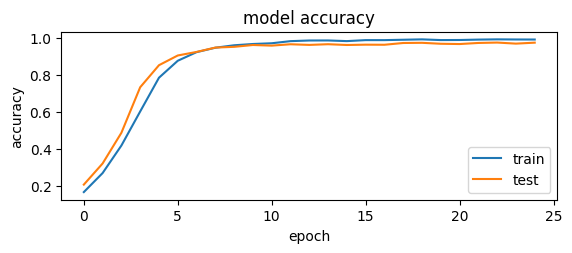

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

train_acc = history.history['accuracy'][-1] * 100
test_acc = history.history['val_accuracy'][-1] * 100
identification_acc = scores[1] * 100

print("Train Accuracy: %.2f%%" % train_acc)
print("Test Accuracy: %.2f%%" % test_acc)
print("Identification Accuracy: %.2f%%" % identification_acc)

plt.show()


Train Loss: 2.4371
Test Loss: 12.3506
Identification Loss: 12.3506


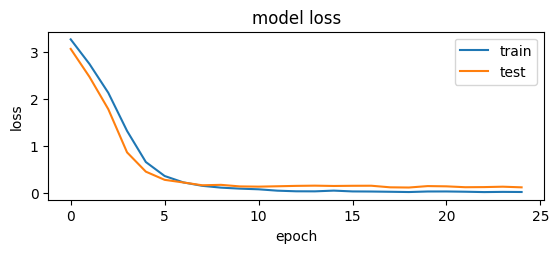

In [ ]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

train_loss = history.history['loss'][-1]*100
test_loss = history.history['val_loss'][-1]*100
identification_loss = scores[0]*100

print("Train Loss: %.4f" % train_loss)
print("Test Loss: %.4f" % test_loss)
print("Identification Loss: %.4f" % identification_loss)

plt.show()


# Predicting for 1st image

In [ ]:
test_img1 = cv.imread(path+"52/2.png",0)
test_img1 = cv.resize(test_img1,(96,96))
test_img1

array([[224, 224, 224, ..., 222, 222, 222],
       [224, 224, 224, ..., 222, 222, 222],
       [224, 224, 224, ..., 223, 223, 223],
       ...,
       [223, 223, 223, ..., 221, 221, 221],
       [223, 223, 223, ..., 221, 221, 221],
       [223, 223, 223, ..., 221, 221, 221]], dtype=uint8)

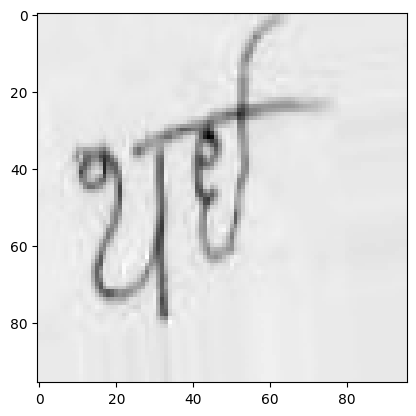

In [ ]:
plt.imshow(test_img1,cmap='gray')

In [ ]:
type(test_img1)

numpy.ndarray

In [ ]:
test_img1.shape

(96, 96)

In [ ]:
test_img1 = test_img1.reshape((1, 96, 96, 1)).astype('float32')

In [ ]:
test_img1.shape

(1, 96, 96, 1)

In [ ]:
test_img1 = test_img1/255

In [ ]:
test_img1

array([[[[0.8784314 ],
         [0.8784314 ],
         [0.8784314 ],
         ...,
         [0.87058824],
         [0.87058824],
         [0.87058824]],

        [[0.8784314 ],
         [0.8784314 ],
         [0.8784314 ],
         ...,
         [0.87058824],
         [0.87058824],
         [0.87058824]],

        [[0.8784314 ],
         [0.8784314 ],
         [0.8784314 ],
         ...,
         [0.8745098 ],
         [0.8745098 ],
         [0.8745098 ]],

        ...,

        [[0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         ...,
         [0.8666667 ],
         [0.8666667 ],
         [0.8666667 ]],

        [[0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         ...,
         [0.8666667 ],
         [0.8666667 ],
         [0.8666667 ]],

        [[0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         ...,
         [0.8666667 ],
         [0.8666667 ],
         [0.8666667 ]]]], dtype=float32)

In [ ]:
result = model.predict(test_img1)

1/1 [==============================] - 0s 296ms/step


In [ ]:
result[0]

array([0.00000000e+00, 8.84956985e-30, 7.44656197e-25, 8.61039607e-25,
       2.79629734e-22, 1.29365458e-23, 5.89491168e-20, 4.02973834e-16,
       1.95031348e-15, 3.29239765e-27, 2.13174832e-20, 3.06282892e-27,
       1.30434007e-20, 1.92949107e-21, 2.03290341e-27, 2.52739624e-33,
       4.48295526e-34, 1.54870072e-34, 5.22693903e-23, 9.20590199e-27,
       1.40204844e-31, 0.00000000e+00, 3.51308618e-30, 0.00000000e+00,
       1.71031158e-25, 1.05505747e-22, 0.00000000e+00, 8.23225816e-24,
       0.00000000e+00, 1.66885645e-34, 6.48211603e-16, 2.47569291e-28,
       1.85429740e-16, 2.25073000e-38, 4.26671671e-14, 5.98779385e-26,
       8.33642266e-38, 0.00000000e+00, 4.47046496e-37, 0.00000000e+00,
       7.09210231e-17, 1.37093007e-22, 6.21884082e-34, 0.00000000e+00,
       1.69473007e-26, 1.06117174e-16, 1.52111246e-18, 9.99971747e-01,
       2.80798904e-05, 1.22429118e-12, 2.77167733e-09, 1.54680592e-07,
       1.18398404e-18, 2.79426496e-19, 2.65303822e-17, 4.52064152e-15,
      

In [ ]:
print(np.argmax(result[0]))

47


# Predicting for 2nd image

In [ ]:
test_img2 = cv.imread(path+"2/380.png",0)
test_img2 = cv.resize(test_img2,(96,96))

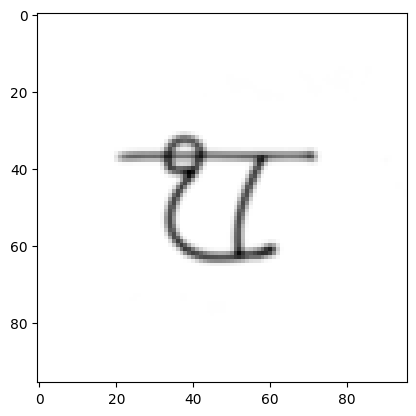

In [ ]:
plt.imshow(test_img2,cmap='gray')

In [ ]:
test_img2 = test_img2.reshape((1, 96, 96, 1)).astype('float32')

In [ ]:
test_img2.shape

(1, 96, 96, 1)

In [ ]:
test_img2 = test_img2/255

In [ ]:
result2 = model.predict(test_img2)

1/1 [==============================] - 0s 18ms/step


In [ ]:
result2[0]

array([0.0000000e+00, 1.6188443e-11, 9.9999821e-01, 1.3345362e-15,
       1.7912401e-20, 3.2739194e-22, 3.5559739e-23, 1.7683625e-06,
       2.4993497e-12, 1.1331125e-14, 1.6946658e-14, 3.2686631e-31,
       1.1868578e-10, 1.9263347e-22, 4.5111720e-20, 2.2642419e-11,
       1.4086309e-24, 6.6763610e-30, 6.7929234e-13, 8.5938253e-32,
       0.0000000e+00, 1.8804010e-19, 8.0126589e-22, 1.2877874e-27,
       5.7611364e-23, 2.1735523e-20, 8.5271860e-22, 1.8089471e-15,
       1.0136245e-23, 5.2176707e-17, 1.6318536e-17, 2.1380056e-17,
       5.3926899e-17, 1.1043808e-27, 2.0592847e-19, 6.0339245e-34,
       3.0135312e-09, 2.1801707e-35, 2.0804647e-31, 3.9752880e-25,
       2.8227951e-11, 2.2819429e-12, 1.8979311e-15, 2.8612413e-24,
       3.9234969e-23, 2.0359944e-17, 3.7075920e-12, 1.6070146e-16,
       6.5659452e-20, 1.2892805e-29, 2.1718128e-34, 8.6935413e-23,
       2.8394184e-32, 0.0000000e+00, 0.0000000e+00, 1.3071279e-29,
       2.4022163e-20, 4.3523670e-31, 9.5871580e-36, 3.5254494e

In [ ]:
np.argmax(result2[0])

2

# Predicting for 3rd image

In [ ]:
test_img3 = cv.imread(path+'3/380.png',0)
test_img3 = cv.resize(test_img3,(96,96))

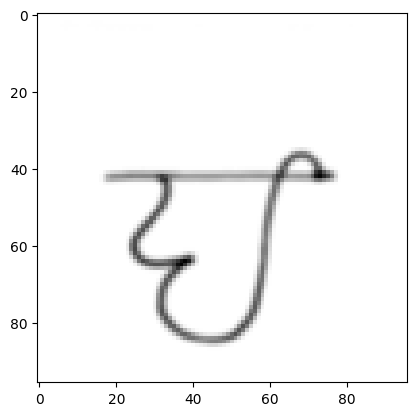

In [ ]:
plt.imshow(test_img3,cmap='gray')

In [ ]:
test_img3 = test_img3.reshape((1, 96, 96, 1)).astype('float32')

In [ ]:
test_img3.shape

(1, 96, 96, 1)

In [ ]:
test_img3 = test_img3/255

In [ ]:
result3 = model.predict(test_img3)

1/1 [==============================] - 0s 22ms/step


In [ ]:
result3[0]

array([0.00000000e+00, 4.90446952e-16, 2.65420368e-12, 9.99998450e-01,
       2.73427275e-15, 2.63048750e-15, 5.20904121e-13, 2.79787857e-13,
       1.38532796e-09, 3.55475672e-14, 2.65331752e-20, 1.02877115e-14,
       7.99341194e-07, 2.17750647e-17, 9.90943612e-12, 1.31515471e-16,
       3.07727958e-20, 4.86549040e-14, 2.34225372e-17, 1.12312821e-15,
       7.23698081e-31, 4.55790116e-17, 4.68112221e-18, 2.98482764e-16,
       6.08535400e-09, 4.48411419e-21, 1.38487555e-10, 6.95182667e-09,
       1.65865082e-08, 1.39969494e-08, 4.11538922e-28, 1.11095019e-07,
       5.32380260e-12, 4.03154594e-08, 2.35485542e-09, 2.76246373e-23,
       2.80464410e-12, 4.43261732e-28, 2.08098012e-17, 2.65643339e-15,
       5.44885961e-15, 4.74611432e-14, 4.27677291e-17, 6.58922488e-07,
       2.73060580e-21, 1.96328269e-08, 5.52195947e-19, 8.54917820e-21,
       4.90311763e-18, 8.55464999e-23, 5.38820566e-33, 1.15611092e-19,
       8.84286518e-35, 0.00000000e+00, 0.00000000e+00, 1.54313279e-35,
      

In [ ]:
np.argmax(result3[0])

3

# Casually predicting

In [ ]:
test_img4 = cv.imread('/content/drive/MyDrive/Dataset/train/1/112.png')
test_img4 = cv.cvtColor(test_img4,cv.COLOR_BGR2GRAY)
test_img4 = cv.resize(test_img4,(96,96))

In [ ]:
test_img4.shape

(96, 96)

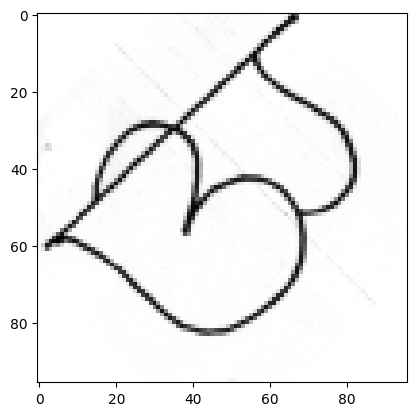

In [ ]:
plt.imshow(test_img4,cmap='gray')

In [ ]:
test_img4 = test_img4.reshape((1, 96, 96, 1)).astype('float32')

In [ ]:
test_img4.shape

(1, 96, 96, 1)

In [ ]:
test_img4 = test_img4/255

In [ ]:
result4 = model.predict(test_img4)

1/1 [==============================] - 0s 34ms/step


In [ ]:
result4[0]

array([0.00000000e+00, 9.99344051e-01, 1.17932329e-13, 9.55007837e-16,
       6.39241507e-11, 3.00051295e-04, 7.99718538e-12, 8.03289879e-08,
       1.44710910e-15, 2.62911431e-04, 9.28463123e-05, 1.89233501e-19,
       6.13806228e-10, 1.73716784e-14, 6.64446457e-14, 1.07620779e-09,
       2.89384974e-15, 3.59395962e-08, 1.09762866e-13, 6.22503595e-22,
       1.74210312e-20, 2.97608781e-24, 1.20143743e-20, 5.33274262e-16,
       1.61280121e-14, 5.09647613e-08, 1.52361124e-19, 1.41659400e-22,
       2.35937836e-23, 3.79151191e-20, 2.03510008e-29, 3.18668630e-22,
       1.58188621e-23, 5.25030012e-26, 1.12590187e-21, 4.55266881e-21,
       9.23083682e-22, 7.81208343e-30, 4.40125433e-19, 1.37267714e-26,
       1.38081725e-19, 2.18179403e-15, 1.74399200e-12, 3.73797763e-33,
       3.43030556e-14, 3.88478109e-16, 1.57347209e-16, 7.85367450e-23,
       8.50711468e-31, 0.00000000e+00, 0.00000000e+00, 8.81014147e-37,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.38729159e-32,
      

In [ ]:
np.argmax(result4[0])

1

In [ ]:
model.save('/content/drive/MyDrive/Dataset/modir.h5')
